In [1]:
#!pip install tweepy


In [2]:
#!pip install TextBlob


In [3]:
#!pip install wordCloud


In [4]:
!pip install mathplot

In [5]:
from __future__ import unicode_literals, absolute_import
import sys
import json
import warnings
from collections import defaultdict

import nltk

from textblob.decorators import cached_property, requires_nltk_corpus
from textblob.utils import lowerstrip, PUNCTUATION_REGEX
from textblob.inflect import singularize as _singularize, pluralize as _pluralize
from textblob.mixins import BlobComparableMixin, StringlikeMixin
from textblob.compat import unicode, basestring
from textblob.base import (BaseNPExtractor, BaseTagger, BaseTokenizer,
                       BaseSentimentAnalyzer, BaseParser)
from textblob.np_extractors import FastNPExtractor
from textblob.taggers import NLTKTagger
from textblob.tokenizers import WordTokenizer, sent_tokenize, word_tokenize
from textblob.sentiments import PatternAnalyzer
from textblob.parsers import PatternParser
from textblob.translate import Translator
from textblob.en import suggest

In [6]:
import pandas as pd
import tweepy
import config
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [7]:
#  Twitter API key and API secret
#API_KEY="nymbcQ5PfVLf1EaGesj9pcfNm"BillGates

#ACCESS_TOKEN="1537865524369039360-6oamW5nni6pqRF8fWFeKDRSQrFyG7B"

#API_KEY_SECRET="PTnohRf1Bp0AqwOovhioNNAdBfM1ESLTqQ6PwbquCZzLPAv4eA"

#ACCESS_TOKEN_SECRET="nwKkuMhW30F2Xdc4RXtenAvLtVOEjB5pTc9J4trXxgQIx"

#BEARER_TOKEN="AAAAAAAAAAAAAAAAAAAAAGG9dwEAAAAARWtdwxYFJ0kg9zOvoMv954%2FnUHo%3D4ax0FLlzos1cVt82HjVi4WH8CgDdoWHP3O796YAtFXfqsRD8Ut"

In [8]:
# authenticate
auth = tweepy.OAuthHandler(config.API_KEY, config.API_KEY_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
posts = api.user_timeline(screen_name = "BillGates", count=100, lang="en", tweet_mode="extended") 

Unexpected parameter: lang


In [10]:
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[0:5]:
    print(str(i) +')'+tweet.full_text+'\n')
    i=i+1 

Show the 5 recent tweets:

1)If you want to understand what’s going on with politics in the United States, Why We’re Polarized by @ezraklein is the book to pick up. https://t.co/rkDceLlCKT

2)This is a sad day. Reversing Roe v. Wade is an unjust and unacceptable setback. And it puts women’s lives at risk, especially the most disadvantaged.

3)Through renewed investments in malaria and NTDs, we can help end these endemic diseases, and prevent future pandemics. https://t.co/Aw9fIJHr2H

4)Daniel Boakye of @TheENDFund has spent 45 years working on solutions for neglected tropical diseases, including river blindness. As he says, “We have the tools we need. The priority now is to deploy them in the right way to get to elimination.” https://t.co/Mzdh5sOoCr

5)When most people think about what produces greenhouse gas emissions, they think about cars and electricity. But they add up to only about one third of the total. Clean hydrogen could help eliminate the rest: https://t.co/CtB8gnMB2Z https

In [11]:
#Create a dataframe column 
df=pd.DataFrame([tweet.full_text for tweet in posts],columns =['Tweets'])

In [12]:
df.head()

,Tweets
0,If you want to understand what’s going on with...
1,This is a sad day. Reversing Roe v. Wade is an...
2,Through renewed investments in malaria and NTD...
3,Daniel Boakye of @TheENDFund has spent 45 year...
4,When most people think about what produces gre...


In [13]:
#clean the text
#Create a function to clean the text
def cleantxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)#removes @mentions
    text=re.sub(r'#','', text)#removes'#' symbol
    text=re.sub(r'RT[\s]+','', text)#removes RT
    text=re.sub(r'https?:\/\/\S+','', text)#remove the hyperlink
    return(text)

In [14]:
#clening text
df['Tweets']=df['Tweets'].apply(cleantxt)

In [15]:
#cleaned text
df.head()


,Tweets
0,If you want to understand what’s going on with...
1,This is a sad day. Reversing Roe v. Wade is an...
2,Through renewed investments in malaria and NTD...
3,Daniel Boakye of has spent 45 years working o...
4,When most people think about what produces gre...


In [16]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [17]:
#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [18]:
#create two new columns

df['Subjectivity']=df['Tweets'].apply(getSubjectivity)

In [19]:
df['Polarity']=df['Tweets'].apply(getPolarity)

In [20]:
#New dataframe
df

,Tweets,Subjectivity,Polarity
0,If you want to understand what’s going on with...,0.000000,0.000000
1,This is a sad day. Reversing Roe v. Wade is an...,0.833333,0.000000
2,Through renewed investments in malaria and NTD...,0.125000,0.000000
3,Daniel Boakye of has spent 45 years working o...,0.317857,0.092857
4,When most people think about what produces gre...,0.590000,0.173333
...,...,...,...
95,I’m looking forward to this chat with at and .,0.000000,0.000000
96,The best way to prevent pneumonia is to vaccin...,0.650000,1.000000
97,Giving a TED talk is always a memorable (and n...,0.750000,0.562500
98,"Each day, polio workers around the world cross...",0.000000,0.000000


In [21]:
#Plot the Word Cloud
allWords=''.join( [tweets for tweets in df['Tweets']] )

wordCloud=WordCloud(width=800, height=400,random_state=21, max_font_size=119).generate(allWords)

<function matplotlib.pyplot.show(close=None, block=None)>

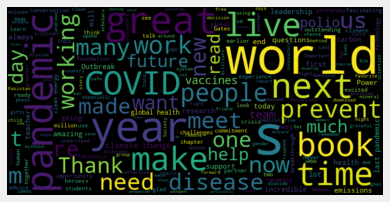

In [22]:
plt.imshow(wordCloud,interpolation="bilinear" )
plt.axis('off')
plt.show

In [23]:
#create a function to compute negative neutral and  positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return'Neutral'
    else:
        return'Positive'

In [24]:

df['Analysis']=df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,If you want to understand what’s going on with...,0.000000,0.000000,Neutral
1,This is a sad day. Reversing Roe v. Wade is an...,0.833333,0.000000,Neutral
2,Through renewed investments in malaria and NTD...,0.125000,0.000000,Neutral
3,Daniel Boakye of has spent 45 years working o...,0.317857,0.092857,Positive
4,When most people think about what produces gre...,0.590000,0.173333,Positive
...,...,...,...,...
95,I’m looking forward to this chat with at and .,0.000000,0.000000,Neutral
96,The best way to prevent pneumonia is to vaccin...,0.650000,1.000000,Positive
97,Giving a TED talk is always a memorable (and n...,0.750000,0.562500,Positive
98,"Each day, polio workers around the world cross...",0.000000,0.000000,Neutral


In [25]:
#Print all of the positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range (0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive' ):
        print(str(j)+')'+sortedDF['Tweets'][i])
        print()
        j=j+1



1)Daniel Boakye of  has spent 45 years working on solutions for neglected tropical diseases, including river blindness. As he says, “We have the tools we need. The priority now is to deploy them in the right way to get to elimination.” 

2)When most people think about what produces greenhouse gas emissions, they think about cars and electricity. But they add up to only about one third of the total. Clean hydrogen could help eliminate the rest:  

3)Important guidance from  founder _hfillit outlining the path forward on Alzheimer’s: 
▪️ More – and better – biomarkers
▪️ Exploratory trials
▪️ Repurposed drugs


4)My advice is simple: read a lot and discover a skill you enjoy. For some, that means being great at science or a great communicator. There’s so much opportunity to do good in the world.

5)It made me think a lot about what I would tell my younger self. I remember this guy. A lot has changed since this photo, but I remember how excited I felt for the next chapter. 

6)I was recen

In [26]:
#print negative prints
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending='False')
for i in range (0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative' ):
        print(str(j)+')'+sortedDF['Tweets'][i])
        print()
        j=j+1

1)Yesterday, I had a chance to spend the day focusing on climate – and the innovations that can prevent the very worst effects of climate change. 

2)To avoid another COVID-19 – or worse – the world needs a full-time, paid team whose entire job is to prevent pandemics. I call it GERM: 



<function matplotlib.pyplot.show(close=None, block=None)>

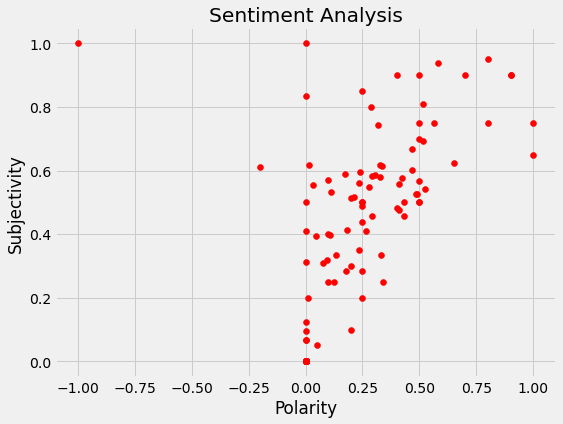

In [27]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range (0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Red')

plt.title('Sentiment Analysis')   
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show

In [28]:
#Get the percentage of positive tweets
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']
round((ptweets.shape[0]/df.shape[0])*100, 1)

73.0

In [29]:
#Get the percentage of positive tweets
ntweets=df[df.Analysis=='Negative']
ntweets=ntweets['Tweets']
round((ptweets.shape[0]/df.shape[0])*100, 1)

73.0

In [30]:
# Show value counts
df['Analysis'].value_counts()


Positive    73
Neutral     25
Negative     2
Name: Analysis, dtype: int64

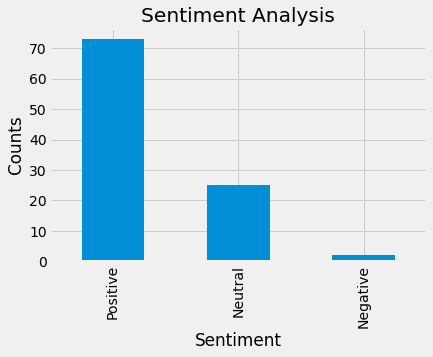

In [31]:
#Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [32]:
#new_search = search_words + " -filter:retweets"
#new_search
search_query = "#COVID 19-filter:retweets"

In [33]:
# get tweets from the API
tweets = tweepy.Cursor(api.search_tweets,
              q=search_query,
              lang="en").items(60)
              #created_at="2020-09-16").items(50)

In [34]:
# store the API responses in a list
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

Total Tweets fetched: 60


In [35]:
tweets_copy

[Status(_api=<tweepy.api.API object at 0x7fa332019940>, _json={'created_at': 'Tue Jun 28 14:43:02 +0000 2022', 'id': 1541794306851307521, 'id_str': '1541794306851307521', 'text': "COVID-19: People in France 'should wear masks again on public transport' as new coronavirus wave hits nation | Worl… https://t.co/4yx5li3kiM", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/4yx5li3kiM', 'expanded_url': 'https://twitter.com/i/web/status/1541794306851307521', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 459126134, 'id_str': '459126134', 'name': 'Joseph Healy', 'screen_n

In [36]:
# intialize the dataframe
tweets_df = pd.DataFrame()

In [37]:
# populate the dataframe
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)


In [38]:
# show the dataframe
tweets_df.head()

,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,Joseph Healy,Southwark. Dubliner in London,Ecosocialist. Chair London & Eastern UNITE LGB...,False,2022-06-28 14:43:02+00:00,COVID-19: People in France 'should wear masks ...,None,Twitter for iPhone
1,ANews,"Istanbul, Turkey","Perspectives change, truth remains; discover t...",False,2022-06-28 14:40:11+00:00,#China on Tuesday cut its #quarantine period i...,"[China, quarantine]",ANews Twitter
2,Patrick Youssef,"Geneva, Switzerland",Regional Director @ICRC_Africa / @CICR_Afrique,False,2022-06-28 14:39:20+00:00,1 million people in remote conflict-affected a...,"[Mozambique, COVID]",Twitter Web App
3,Chandrashekhar Bhalki,Hyderabad,@TheHindu | Passionate about any subject/issue...,False,2022-06-28 14:35:09+00:00,459 #Covid-19 cases reported in #Telangana on ...,"[Covid, Telangana]",Twitter Web App
4,Volunteer for Health,"St Louis, MO",Help improve future health care! Participate i...,False,2022-06-28 14:31:30+00:00,Have you had #COVID? A #WashUMed research stud...,"[COVID, WashUMed]",Twitter Web App
